# Interactive Plotting and Monte Carlo simulations of CPPI

In [27]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import sys, importlib

sys.path.insert(1, "../../week-one")
erk = importlib.import_module("edhec-risk-kit")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### GBM Interactive Plots

<Axes: >

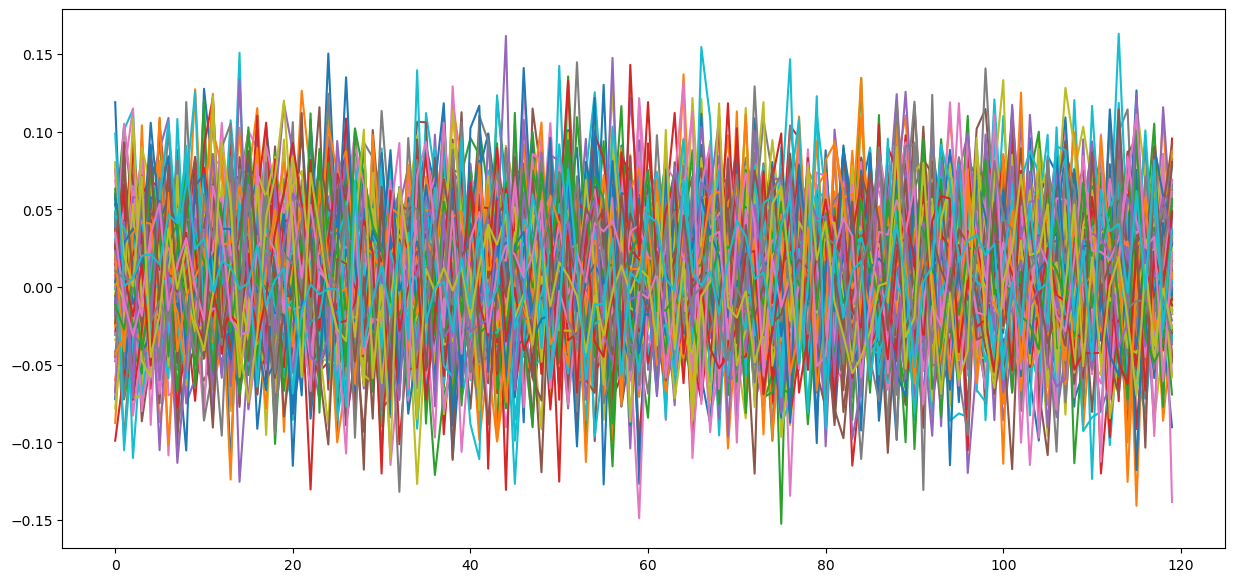

In [28]:
erk.gbm(10, 100, mui=0.1).plot(figsize=(15, 7), legend=False)

In [29]:
def show_gbm(n_scenarios, mui, sigma):
    """
    Draw the results of a stock price evoluation under a Geometric Brownian Motion model
    """
    s_0 = 100
    prices = erk.gbm(n_scenarios=n_scenarios, mui=mui, sigma=sigma, s_0=s_0)
    ax = prices.plot(figsize=(15, 7), legend=False, alpha=0.5, linewidth=2)
    ax.axhline(y=100, ls=":", color="black")
    ax.set_xlim([0, prices.shape[0]])
    ax.set_ylim(top=400)

    # draw a dot at the origin
    ax.plot(0, s_0, marker='o', color="darkred", alpha=0.2)

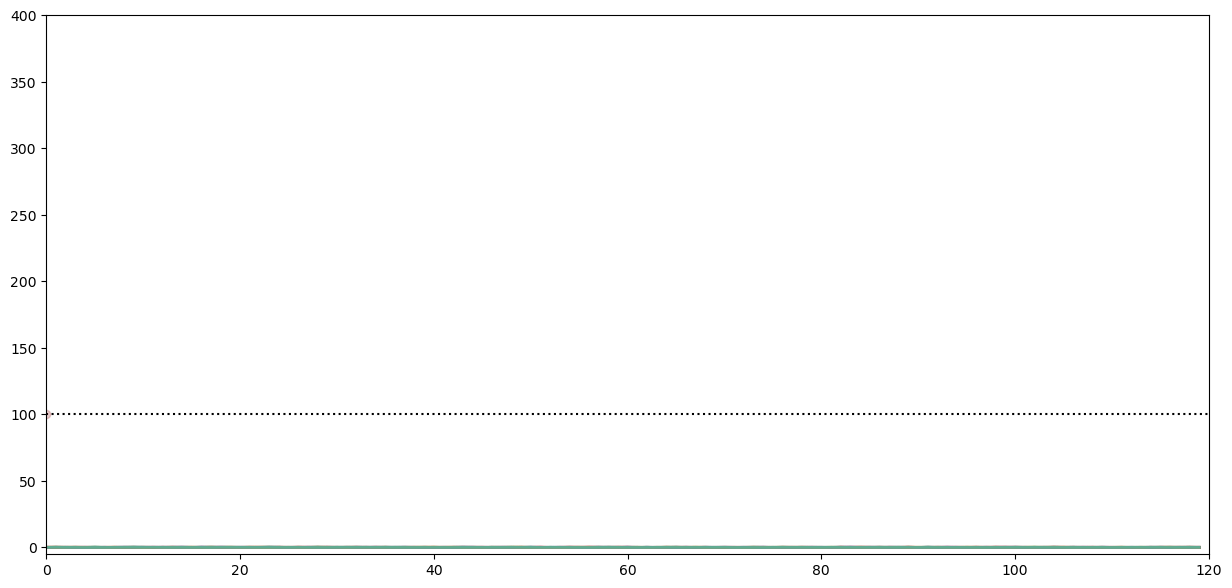

In [30]:
show_gbm(30, 0.07, 0.15)

In [31]:
gbm_controls = widgets.interactive(show_gbm, n_scenarios=(1, 20, 1), mui=(0, 0.2, 0.01), sigma=(0, .3, .01))

gbm_controls

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.1, de…

In [32]:
gbm_controls = widgets.interactive(show_gbm, n_scenarios=(
    1, 20, 1), mui=(-0.2, 0.2, 0.01), sigma=(0, .3, .01))

gbm_controls

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.0, de…

## Interactive CPPI Simulation - Monte Carlo

In [33]:
def show_cppi(n_scenarios=50, mui=0.07, sigma=0.15, multiplier=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    simulation_rets = erk.gbm(n_scenarios=n_scenarios, mui=mui, sigma=sigma, steps_per_year=12)

    risky_returns = pd.DataFrame(simulation_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_asset_return=risky_returns, riskfree_rate=riskfree_rate, multiplier=multiplier, start=start, floor=floor)
    wealth = btr["Wealth"]

    print({"first_y_max": y_max})

    y_max = wealth.values.max() * y_max / 100

    print({"y_max": y_max, "y": start * floor, "start": start, "floor": floor})
    print({"max.wealth": wealth.values.max()})

    ax = wealth.plot(figsize=(15, 7), legend=False, alpha=0.3)
    ax.axhline(y=start, linestyle=":", color="black")
    ax.axhline(y=start * floor, linestyle="--", color="red")
    ax.set_ylim(top=y_max)

In [34]:
cppi_controls = widgets.interactive(show_cppi, n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), mui=(0, 0.2, 0.01), sigma=(0, 0.3, 0.05), floor=(
    0, 2, 0.1), multiplier=(1, 5, 0.5), riskfree_rate=(0, 0.05, 0.01), y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))

cppi_controls

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [35]:
import matplotlib.pyplot as plt

def show_cppi(n_scenarios=50, mui=0.07, sigma=0.15, multiplier=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    simulation_rets = erk.gbm(n_scenarios=n_scenarios,
                              mui=mui, sigma=sigma, steps_per_year=12)

    risky_returns = pd.DataFrame(simulation_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_asset_return=risky_returns, riskfree_rate=riskfree_rate,
                       multiplier=multiplier, start=start, floor=floor)
    wealth = btr["Wealth"]

    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(figsize=(15, 7), nrows=1, ncols=2, sharey=True, gridspec_kw={'width_ratios': [3, 2]})
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, figsize=(15, 7), legend=False, alpha=0.3)
    wealth_ax.axhline(y=start, linestyle=":", color="black")
    wealth_ax.axhline(y=start * floor, linestyle="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(ax=hist_ax, bins=50,ec="w", fc="indianred", orientation="horizontal")
    hist_ax.axhline(y=start, ls=":", color="black")

In [36]:
cppi_controls = widgets.interactive(show_cppi, n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), mui=(0, 0.2, 0.01), sigma=(0, 0.3, 0.05), floor=(
    0, 2, 0.1), multiplier=(1, 5, 0.5), riskfree_rate=(0, 0.05, 0.01), y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))

cppi_controls

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [53]:
import matplotlib.pyplot as plt
import numpy as np


def show_cppi(n_scenarios=50, mui=0.07, sigma=0.15, multiplier=3, floor=0., riskfree_rate=0.03, steps_per_year=12, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100
    simulation_rets = erk.gbm(n_scenarios=n_scenarios,
                              mui=mui, sigma=sigma, steps_per_year=steps_per_year)

    risky_returns = pd.DataFrame(simulation_rets)
    # run the "back"-test
    btr = erk.run_cppi(risky_asset_return=risky_returns, riskfree_rate=riskfree_rate,
                       multiplier=multiplier, start=start, floor=floor)
    wealth = btr["Wealth"]

    # calculate terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]

    terminal_wealth_mean = terminal_wealth.mean()
    terminal_wealth_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth, start * floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures / n_scenarios

    e_shortfall = np.dot(terminal_wealth - start * floor, failure_mask) / n_failures if n_failures > 0 else 0.0

    # Plot!
    fig, (wealth_ax, hist_ax) = plt.subplots(figsize=(15, 7), nrows=1,
                                             ncols=2, sharey=True, gridspec_kw={'width_ratios': [3, 2]})
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax=wealth_ax, figsize=(15, 7), legend=False, alpha=0.3)
    wealth_ax.axhline(y=start, linestyle=":", color="black")
    wealth_ax.axhline(y=start * floor, linestyle="--", color="red")
    wealth_ax.set_ylim(top=y_max)

    terminal_wealth.plot.hist(
        ax=hist_ax, bins=50, ec="w", fc="indianred", orientation="horizontal")
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=terminal_wealth_mean, ls=":", color="blue")
    hist_ax.axhline(y=terminal_wealth_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(terminal_wealth_mean)}", xy=(
        0.65, 0.9), xycoords="axes fraction", fontsize=16)
    hist_ax.annotate(f"Median: ${int(terminal_wealth_median)}", xy=(
        0.65, 0.85), xycoords="axes fraction", fontsize=16)
    
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail * 100:2.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=(0.6, 0.7), xycoords="axes fraction", fontsize=16)

In [56]:
cppi_controls = widgets.interactive(show_cppi, n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50), mui=(0, 0.2, 0.01), sigma=(0, 0.5, 0.05), floor=(
    0, 2, 0.1), multiplier=(1, 5, 0.5), riskfree_rate=(0, 0.05, 0.01), steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Rebalance/Year"), y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))

cppi_controls

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…